In [62]:
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('scikit-allel version: %s' %allel.__version__)
print('pandas version: %s' %pd.__version__)
print('numpy version: %s' %np.__version__)

scikit-allel version: 1.3.8
pandas version: 2.2.2
numpy version: 1.26.4


In [63]:
import malariagen_data
print('malariagen_data version %s' %malariagen_data.__version__)
#ag3 = malariagen_data.Ag3("gs://vo_agam_release/")
#ag3

malariagen_data version 9.0.1


In [64]:
def plot_coords(
    data,
    x='PC1',
    y='PC2',
    titlex=None,
    titley=None,
    z=None,
    color=None,
    color_map=None,
    color_continuous_scale=None,
    symbol=None,
    symbol_map=None,
    jitter_frac=0.02,
    title=None,
    marker_size=8,
    template='simple_white',
    slug=None,
    random_seed=42,
    show=False,
    figure_name=None,
    ):

    # setup data
    data = data.copy()
    
    # add PC coords as dataframe columns, with jitter if desired
    if jitter_frac:
        np.random.seed(random_seed)
        data[x] = jitter(data[x], jitter_frac)
        data[y] = jitter(data[y], jitter_frac)
        if z:
            data[z] = jitter(data[z], jitter_frac)
    
    # setup common plotting arguments
    scatter_kwargs = dict(
        color=color, 
        color_discrete_map=color_map,
        color_continuous_scale=color_continuous_scale,
        symbol=symbol,
        symbol_map=symbol_map,
        hover_name='sample_id',
        hover_data=[
            'pca_pops',
        ],
        width=850,
        height=650,
        title=title,
        template=template,
    )
        
    
    # hack fixed marker size, 2D only (3D has bugs)
    if marker_size and not z:
        data['size'] = marker_size
        scatter_kwargs['size'] = 'size'
        scatter_kwargs['size_max'] = marker_size
        scatter_kwargs['opacity'] = 0.9

    if z:
        # 3D scatter plot
        fig = px.scatter_3d(data, x=x, y=y, z=z, **scatter_kwargs)
        
    else:
        # 2D scatter plot
        fig = px.scatter(data, x=x, y=y, render_mode='svg', **scatter_kwargs)
      #  fig.update_layout(
       # xaxis = dict(
       #     tickmode = 'array',
       #     tickvals = [-150, -100,  -50,    0,   50,  100,  150,  200]))
       # fig.update_layout(
        #    yaxis = dict(
        #    tickmode = 'array',
        #    tickvals = [-150, -100,  -50,    0,   50,  100,  150,  200])) #    
    #    fig.update_layout(yaxis_range=[-150, 200])
     #fig.update_layout(xaxis_range=[-150, 150])
        fig.update_layout(xaxis_title=titlex, yaxis_title=titley)
        fig.update_layout(title_text=title, title_x=0.5)
        fig.update_layout(coloraxis_colorbar=dict(title="AIMs CO Fraction",))
        

    if slug:
        path = f'plot-{slug}-{x}-{y}-{z}-{color}.html'
        fig.write_html(path, include_plotlyjs='cdn')
                
    if show:
        fig.update_layout(legend_orientation="h")
        fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=16),  # Imposta la dimensione del carattere degli xticks
        title_font=dict(size=22)  # Imposta la dimensione del carattere del titolo dell'asse x
    ),
    yaxis=dict(
        tickfont=dict(size=16),  # Imposta la dimensione del carattere degli yticks
        title_font=dict(size=22)  # Imposta la dimensione del carattere del titolo dell'asse y
    ),
            showlegend=False, title_font=dict(size=24)
)
        fig.write_image(figure_name, scale=2)
        fig.show()


In [65]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1


pca_symbols_map = {
    'An.gam': 'circle', 
    'An.col': 'circle',
    'gcx1-GM': 'cross',
    'gcx1-GW': 'cross',
    'gcx2': 'cross',
}


species_color_map = {
    'An.gam':  species_palette[19],
    'An.col': species_palette3[0],
    'gcx1-GM': species_palette[2],
    'gcx1-GW': species_palette2[2],
    'gcx2': species_palette3[4],
}

In [66]:
def jitter(a, f):
    r = a.max() - a.min()
    return a + f * np.random.uniform(-r, r, a.shape)

---------------------
## Chromosome 3

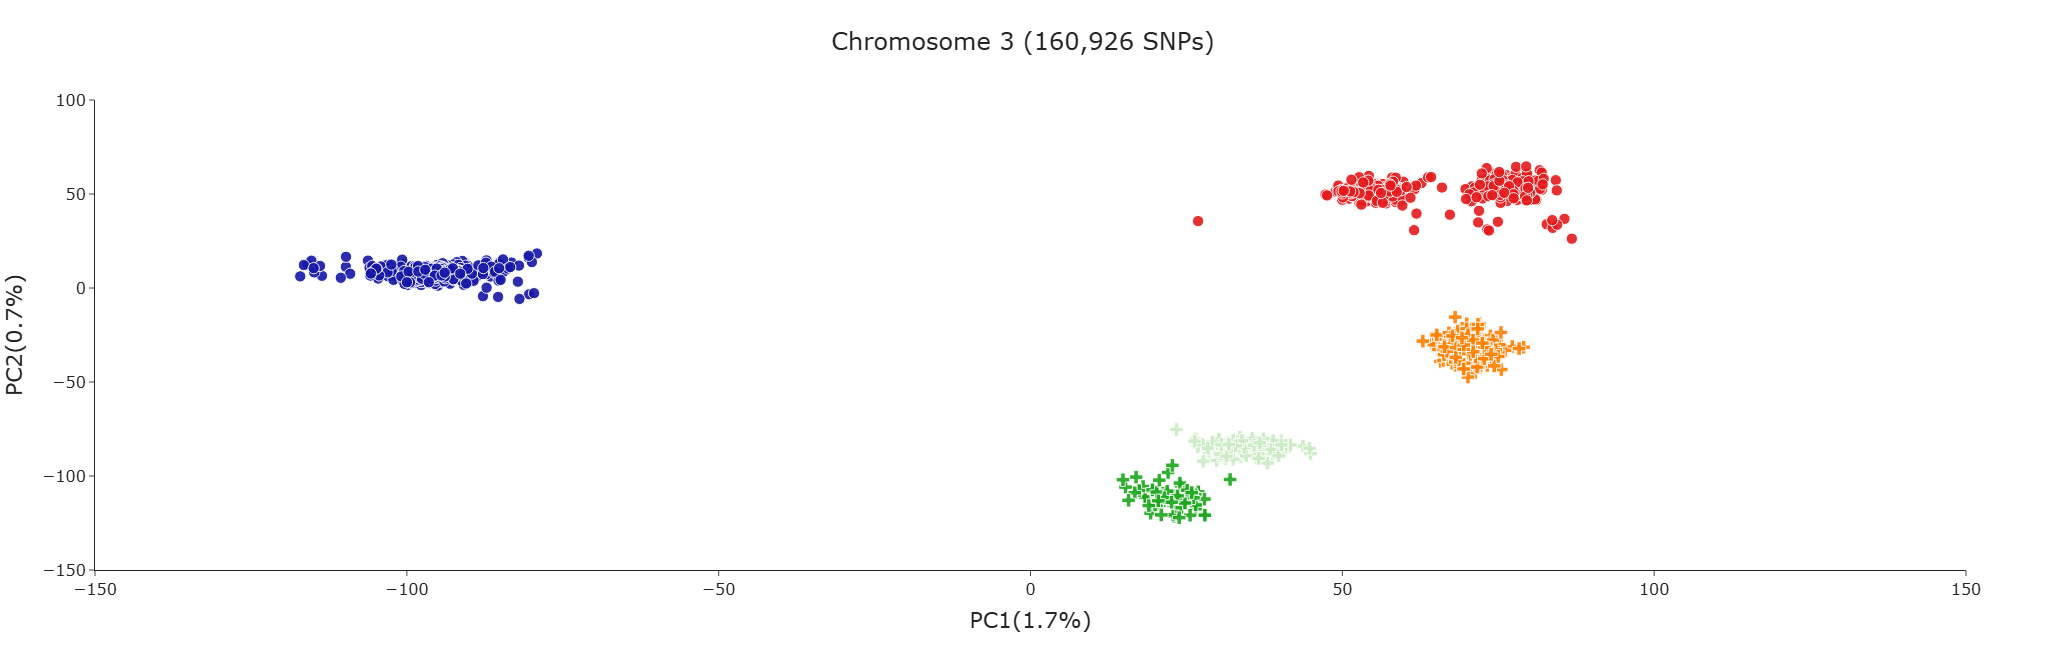

In [61]:
pca_chrom3 = plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/chr3_pca_final.csv'), x='PC1', y='PC2', title="Chromosome 3 (160,926 SNPs)",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(1.7%)', titley='PC2(0.7%)',figure_name='chr3.png')

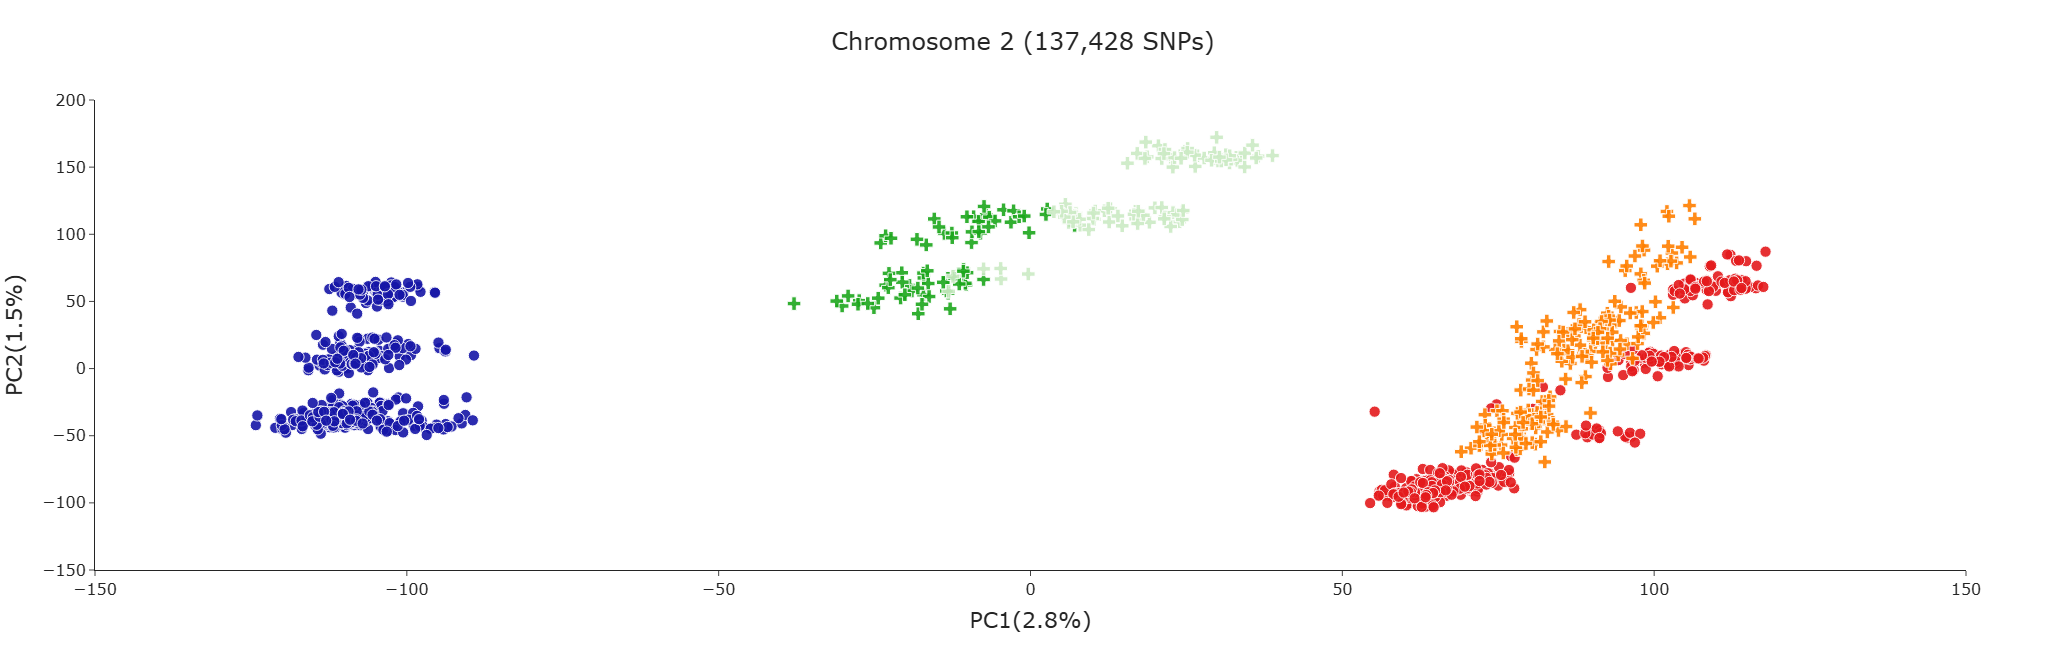

In [64]:
pca_chrom2_all = plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/chr2_pca_final.csv'), x='PC1', y='PC2', title="Chromosome 2 (137,428 SNPs)",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True,  titlex='PC1(2.8%)', titley='PC2(1.5%)', figure_name='chr2.png')

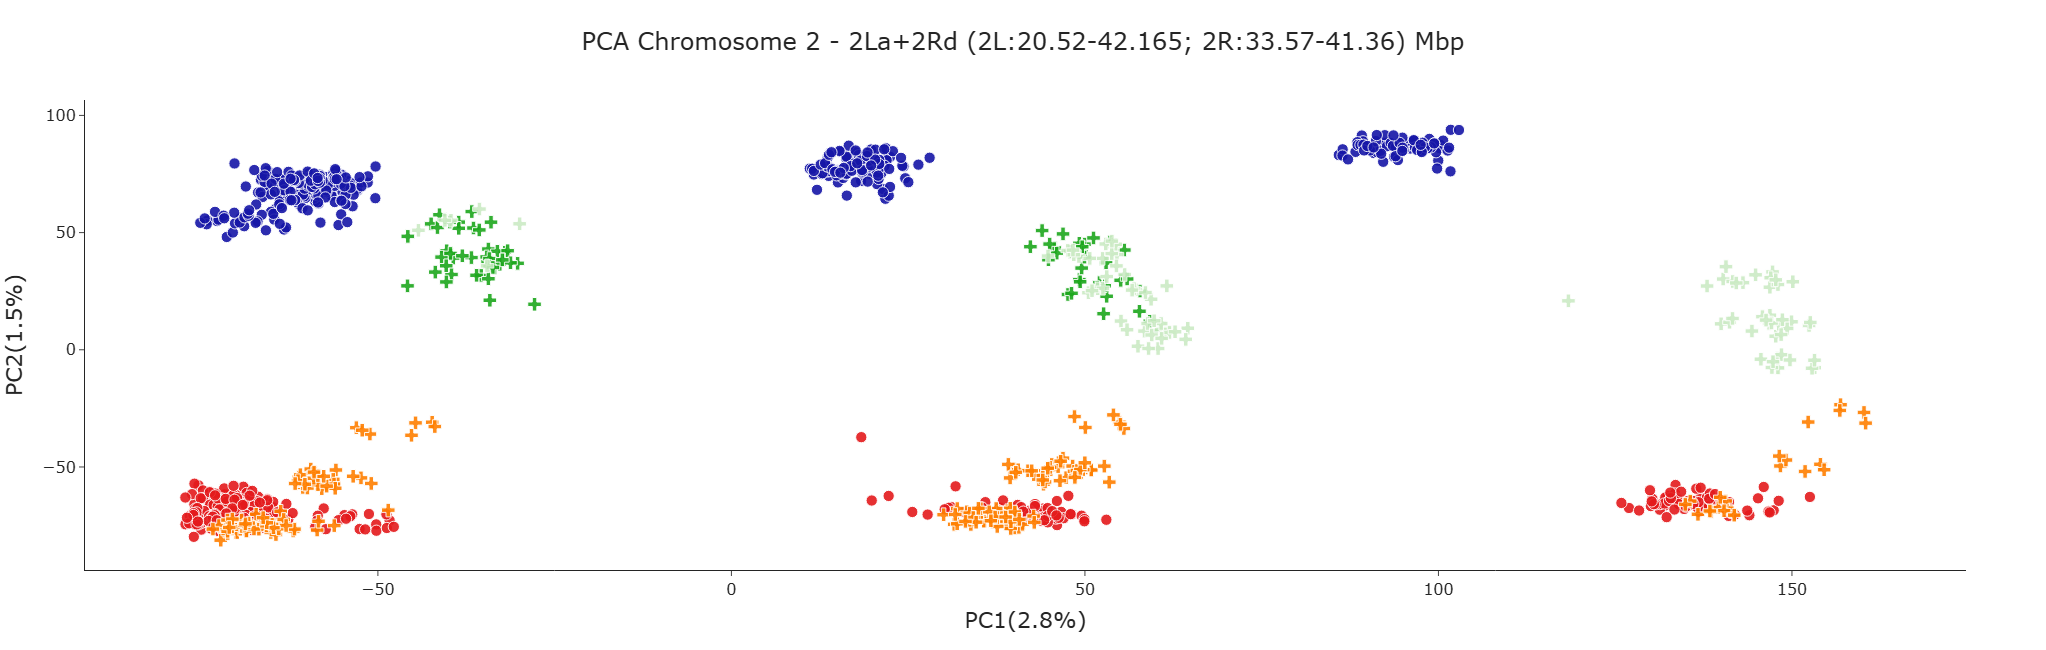

In [75]:
pca_chrom2 = plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/chr2_pca.csv'), x='PC1', y='PC2', title="PCA Chromosome 2 - 2La+2Rd (2L:20.52-42.165; 2R:33.57-41.36) Mbp",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(2.8%)', titley='PC2(1.5%)', figure_name='chr2_inv.png')

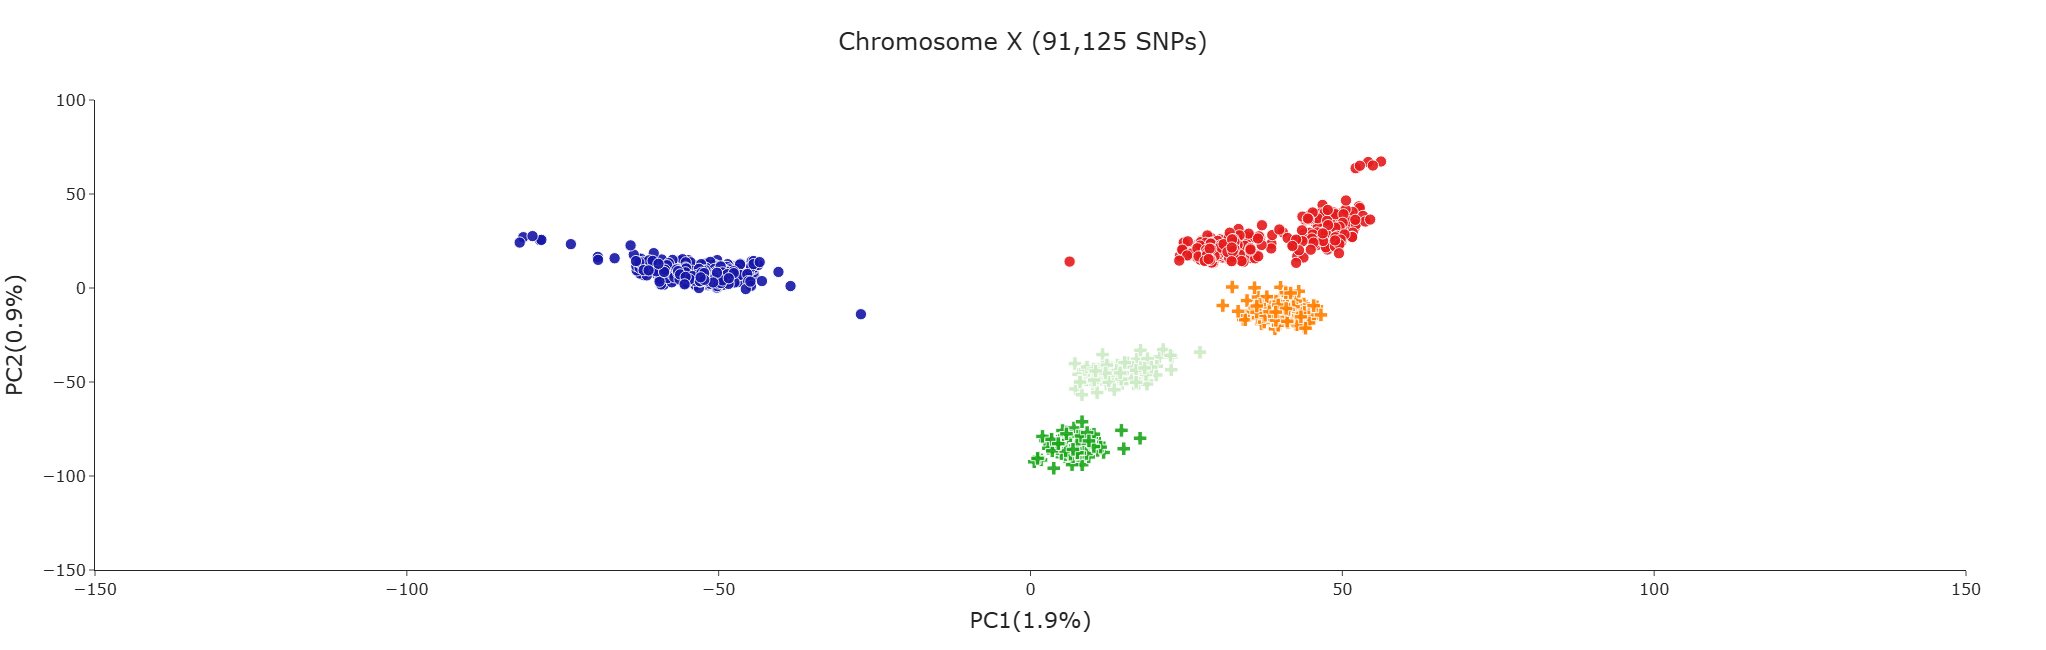

In [62]:
pca_chromx = plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/chrX_pca_final.csv'), x='PC1', y='PC2', title="Chromosome X (91,125 SNPs)",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(1.9%)', titley='PC2(0.9%)',figure_name='chrX.png')

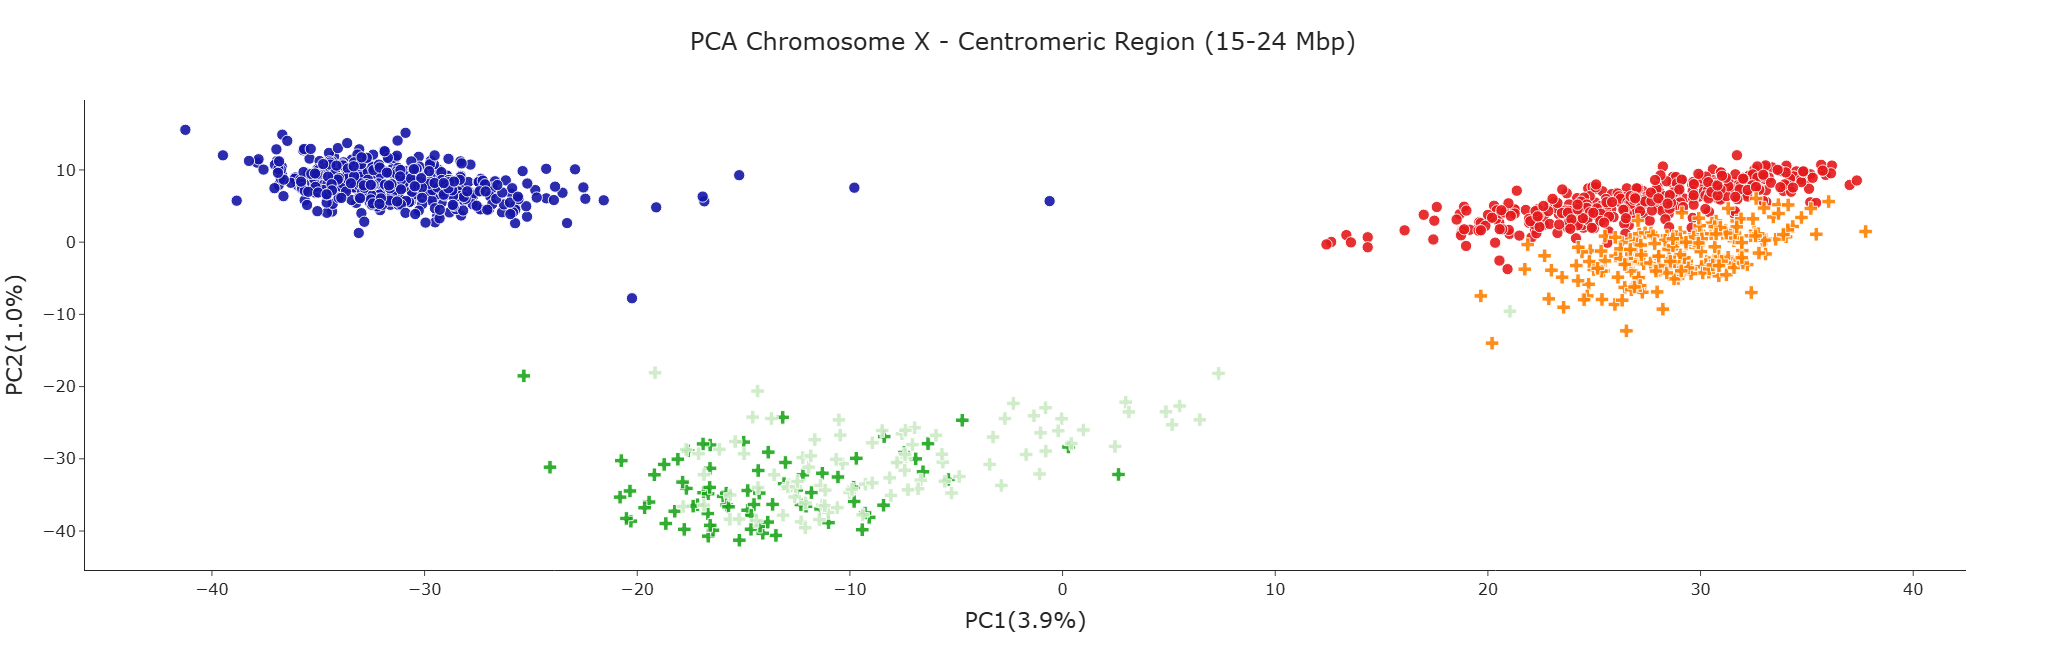

In [73]:
plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/chrx_island_pca_final.csv'), x='PC1', y='PC2', title="PCA Chromosome X - Centromeric Region (15-24 Mbp)",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(3.9%)', titley='PC2(1.0%)',figure_name='Centromere.png')

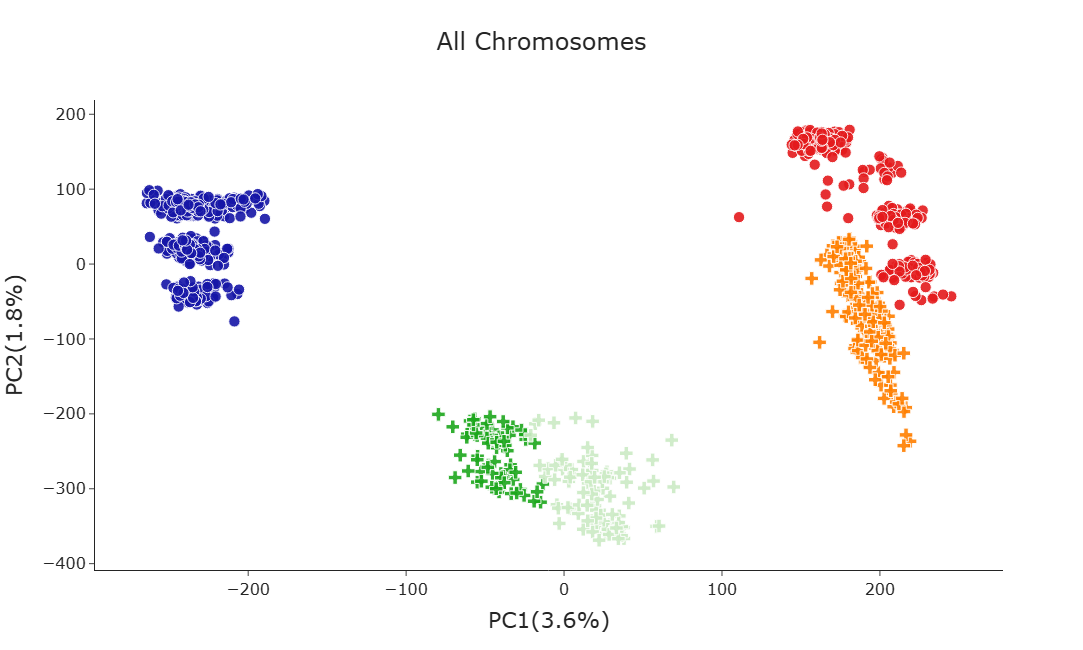

In [67]:
pca_chrom3 = plot_coords(pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/pca_outputs/all_chr_pca.csv'), x='PC1', y='PC2', title="All Chromosomes",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(3.6%)', titley='PC2(1.8%)',figure_name='all_chrom.png')

In [39]:
df_opondo = pd.read_csv('phase3_plus_opondo_ngwa (3).csv')

In [40]:
df_samples = pd.read_excel("/mnt/c/Users/rando/Documenti/Ag1000G/Data/Meta/meta_new_3_0.xlsx", sheet_name=0)

In [41]:
df_opondo.set_index('sample_id', inplace=True)
df_samples.set_index('sample_id', inplace=True)

In [42]:
df_opondo['pca_pops'].fillna(df_samples['pca_pops'], inplace=True)

/tmp/ipykernel_208447/2538488259.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
df_opondo = df_opondo.reset_index()
df_opondo['pca_pops'] = df_opondo['pca_pops'].replace({'gcx1_2005': 'gcx1-GM'})

In [45]:
df_opondo.to_csv("phase3_plus_opondo_ngwa.csv")

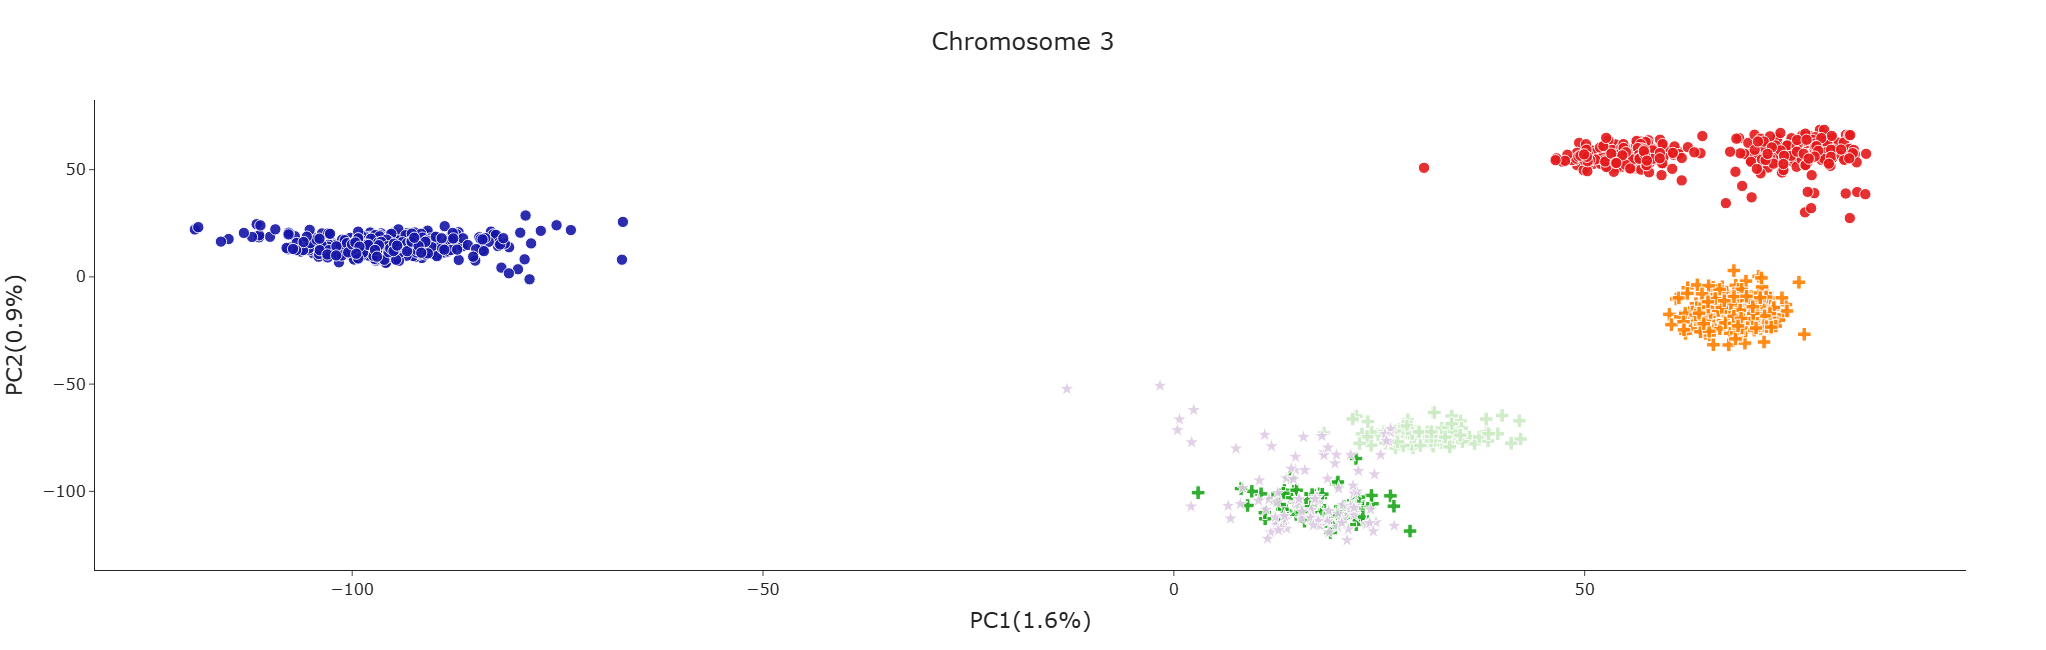

In [61]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1

pca_symbols_map = {
    'An.gam': 'circle', 
    'An.col': 'circle',
    'gcx1-GM': 'cross',
    'gcx1-GW': 'cross',
    'gcx2': 'cross',
     'gcx1': 'star',
}

species_color_map = {
    'An.gam':  species_palette[19],
    'An.col': species_palette3[0],
    'gcx2': species_palette3[4],
    'gcx1-GM': species_palette[2],
    'gcx1': species_palette2[3],
    'gcx1-GW': species_palette2[2],
    
    
}
pca_chrom3 = plot_coords(pd.read_csv('phase3_plus_opondo_ngwa.csv'), x='PC1', y='PC2', title="Chromosome 3",
            color='pca_pops',symbol='pca_pops', symbol_map=pca_symbols_map, slug = 'pca',  color_map=species_color_map, show=True, titlex='PC1(1.6%)', titley='PC2(0.9%)',figure_name='Opondo.png')

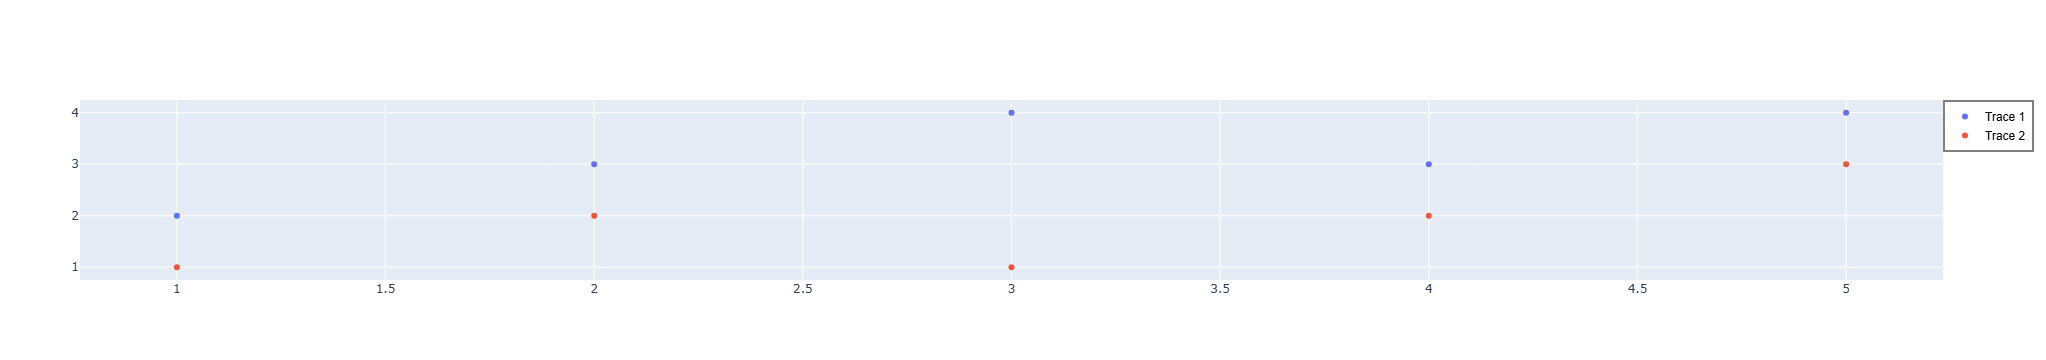

In [18]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 4, 3, 4]
y2 = [1, 2, 1, 2, 3]

# Create traces
trace1 = go.Scatter(
    x=x,
    y=y1,
    mode='markers',
    name='Trace 1'
)

trace2 = go.Scatter(
    x=x,
    y=y2,
    mode='markers',
    name='Trace 2'
)

# Layout
layout = go.Layout(

)

# Create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show plot
fig.show()
